In [2]:
# this is an example of how to obtain normalizedDSM (nDSM) and DTM from DSM using the classDSM.py



# regular libraries
import numpy as np
import math as math
from matplotlib import pyplot as plt
from scipy.interpolate import griddata
import cv2 as cv

# import library for reading raster images
import rasterio as rio





In [3]:

'''
 Following parameters can be set.
 
        inputDSMpath = "folder/inputfile.tif"
        outputnDSMpath = "folder/outputfile.tif"


        # parameters/ thresholds
        img_resolution = 30 # resolution in metres of a pixel
        neighborhood_kernel = 300  # Extent of neighbors in metres: for 10m _ 200; for 30m - 3000

        height_threshold = 3  # meter
        slope_threshold = 30  # degrees using 30 degress for 30m as difficult to identify ground terrain otherwise

        # 8 directions
        obj.scanlines = [[-1, -1], [-1, 0], [-1, 1], [0, 1], [1, 1], [1, 0], [1, -1], [0, -1]]
        obj.scannum = [0, 1, 2, 3, 4, 5, 6, 7]  # keyname for scanlines

#ALthough the default parameters set have been tested in Yangon, they can be further refined else the used as it is.
'''

# Specify the parameters
inputDSMpath = r"G:\My Drive\geospatial_lab\JICA-big-data-course\phnom_penh\N011E105\ALPSMLC30_N011E105_DSM.tif"
outputnDSMpath = r"G:\My Drive\geospatial_lab\JICA-big-data-course\phnom_penh\N011E105\ALPSMLC30_N011E105_nDSM.tif"
img_resolution = 30
neighborhood_kernel = 300
height_threshold = 3
slope_threshold = 30

 Entered DSM2DTM scanline
filling holes
job done 


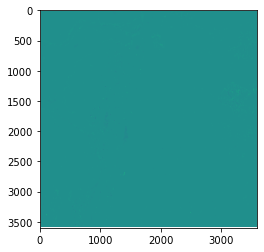

In [4]:
# the real code is abstracted within classDSM_v2_20180705
# ----------------------------------------------------------------------------------------------------


#improt the classDSM
from classDSM import DSMtrans as genDSM

# open the AW3D raster stored in DSMpath as an array DSMarr.
DSMpath = inputDSMpath
DSMarr = rio.open(DSMpath).read(1)

#set the DSMarr as an object of genDSM
obj1 = genDSM(DSMarr)
obj1.resolution = int(img_resolution)
obj1.Ext = int(neighborhood_kernel)
obj1.dThrHeightDiff = int(height_threshold)
obj1.dThrSlope  = int(slope_threshold)

#set the outpath
nDSMpath = outputnDSMpath

# running the ground function generates the DTM and nDSM arrays
(DEMarr, nDSMarr) = obj1.ground()

In [5]:
# Save the result

#these arrays can be saved with same georeference as input DSM. Here we are saving the building height nDSM into nDSMpath
#get aLL ttributes of thwe source
src = rio.open(DSMpath)
# context manager.
with rio.Env():
	# Write the product as a raster band to a new 8-bit file. For
	# the new file's profile, we start with the meta attributes of
	# the source file, but then change the band count to 1, set the
	# dtype to uint8, and specify LZW compression.
	profile = src.profile
	profile.update(
		dtype=rio.float32,
		count=1,
		compress='lzw')

	with rio.open(nDSMpath, 'w', **profile) as dst:
		dst.write(nDSMarr.astype(rio.float32), 1)

print ('output saved')

output saved
